In [12]:
import pandas as pd
import os.path as osp
import seaborn as sns
import xarray as xr
import hvplot.pandas
import matplotlib.pyplot as plt
from utils.basics import PNAS2015_subject_list
from utils.plotting import plot_2d_scatter, plot_3d_scatter

# Select Best-case scenarios to plot

In [2]:
si_LE_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_LE.pkl'
si_LE = pd.read_pickle(si_LE_path)
si_TSNE_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_TSNE.pkl'
si_TSNE = pd.read_pickle(si_TSNE_path)
si_UMAP_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_UMAP.pkl'
si_UMAP = pd.read_pickle(si_UMAP_path)

In [11]:
si_LE.loc['ALL','Original',:].sort_values(by='SI', ascending=False).iloc[0:30]

SI
Subject Input Data Norm    Metric      Knn m Target           
ALL     Original   zscored correlation 5   3 Subject  1.000000
                           cosine      10  3 Subject  1.000000
                   asis    cosine      5   3 Subject  1.000000
                           correlation 5   2 Subject  1.000000
                           euclidean   10  3 Subject  1.000000
                           correlation 10  3 Subject  1.000000
                   zscored correlation 5   2 Subject  1.000000
                   asis    correlation 5   3 Subject  1.000000
                                       15  3 Subject  1.000000
                           euclidean   10  2 Subject  1.000000
                   zscored cosine      10  2 Subject  1.000000
                   asis    correlation 15  2 Subject  1.000000
                   zscored correlation 10  3 Subject  1.000000
                                           2 Subject  1.000000
                   asis    cosine      5   2 Subject  1.000000
                           correlation 10  2 Subject  1.000000
                   zscored euclidean   5   3 Subject  0.980537
                                           2 Subject  0.977240
                   asis    correlation 20  3 Subject  0.969716
                                           2 Subject  0.969572
                                       25  3 Subject  0.953014
                                           2 Subject  0.951761
                           cosine      10  3 Subject  0.947585
                                           2 Subject  0.946693
                                       15  3 Subject  0.944550
                   zscored cosine      5   3 Subject  0.944182
                   asis    cosine      15  2 Subject  0.943468
                           euclidean   5   3 Subject  0.943113
                   zscored cosine      5   2 Subject  0.923672
                           euclidean   10  3 Subject  0.920857

In [9]:
si_LE.loc['ALL','Original',:].hvplot.hist()

:Histogram   [SI]   (SI_count)

In [ ]:
emb_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data_Interim/PNAS2015/ALL/TSNE/Original/'

# Load SI for everything we have

In [53]:
si_LE_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_LE.pkl'
si_LE = pd.read_pickle(si_LE_path)
si_LE = si_LE.loc[PNAS2015_subject_list,'Original',:,:,:,3,:]
si_LE = si_LE.reset_index()

In [55]:
si_TSNE_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_TSNE.pkl'
si_TSNE = pd.read_pickle(si_TSNE_path)
si_TSNE = si_TSNE.loc[PNAS2015_subject_list,'Original',:,:,:,3,:]
si_TSNE = si_TSNE.reset_index()

In [64]:
si_UMAP_path = '/data/SFIMJGC_HCP7T/manifold_learning_fmri/Dashboard/Data/si_UMAP.pkl'
si_UMAP = pd.read_pickle(si_UMAP_path)
si_UMAP = si_UMAP.loc[PNAS2015_subject_list,'Original',:,:,:,:,:,:,3,:]
si_UMAP = si_UMAP.reset_index()

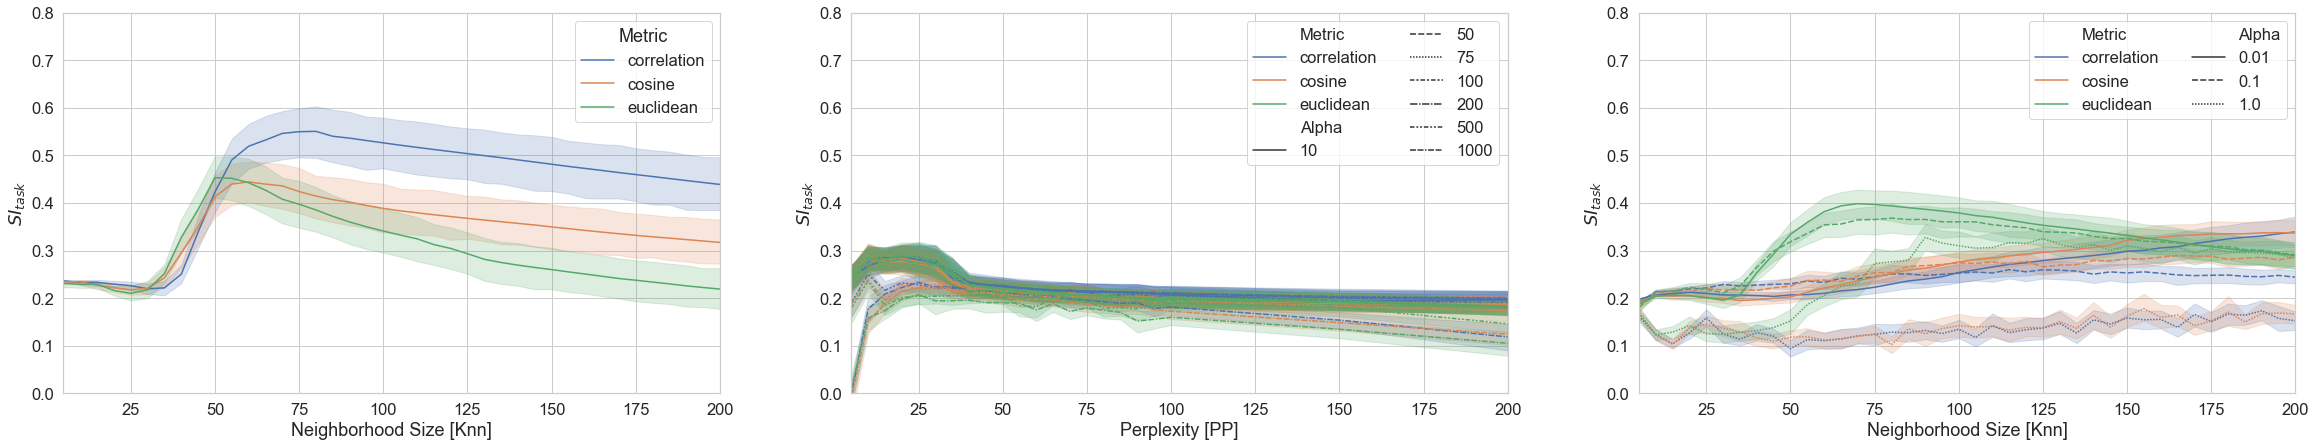

In [66]:
sns.set(font_scale=1.5, style='whitegrid')
fig, axs = plt.subplots(1,3,figsize=(40,7))
g_LE = sns.lineplot(data=si_LE,y='SI',x='Knn', hue='Metric', ax=axs[0])
g_LE.set_ylabel('$SI_{task}$');
g_LE.set_xlabel('Neighborhood Size [Knn]');
g_LE.set_xlim(5,200)
g_LE.set_ylim(0,0.8)
g_TSNE = sns.lineplot(data=si_TSNE,y='SI',x='PP', hue='Metric', style='Alpha', ax=axs[1])
g_TSNE.set_ylabel('$SI_{task}$');
g_TSNE.set_xlabel('Perplexity [PP]');
g_TSNE.set_xlim(5,200)
g_TSNE.set_ylim(0,0.8)
g_TSNE.legend(loc='upper right', ncol=2)
g_UMAP = sns.lineplot(data=si_UMAP,y='SI',x='Knn', hue='Metric', style='Alpha', ax=axs[2])
g_UMAP.set_ylabel('$SI_{task}$');
g_UMAP.set_xlabel('Neighborhood Size [Knn]');
g_UMAP.set_xlim(5,200)
g_UMAP.set_ylim(0,0.8)
g_UMAP.legend(loc='upper right', ncol=2)

In [26]:
g_orig = sns.lineplot(data=data,y='SI',x='Knn', hue='Metric', style='Norm', ax=ax,  palette=ORIGINAL_PALETTE)

,Subject,Norm,Metric,Knn,m,Target,SI
0,SBJ06,asis,correlation,5,3,Task,0.233953
1,SBJ06,asis,correlation,10,3,Task,0.239287
2,SBJ06,asis,correlation,15,3,Task,0.241709
3,SBJ06,asis,correlation,20,3,Task,0.240949
4,SBJ06,asis,correlation,25,3,Task,0.268025
...,...,...,...,...,...,...,...
4795,SBJ27,zscored,euclidean,180,3,Task,0.213407
4796,SBJ27,zscored,euclidean,185,3,Task,0.211469
4797,SBJ27,zscored,euclidean,190,3,Task,0.208938
4798,SBJ27,zscored,euclidean,195,3,Task,0.206422
